In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv' ,
                names=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'])
                
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# finding missing values

In [3]:
df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

There are no missing values

# visualizing data

In [4]:
#remove id column because no need for it in classification
df.drop('Id number' , axis=1 , inplace=True)

In [5]:
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64


8.03    5
8.43    5
9.57    4
8.79    

from above wee se that all columns contains contiuous numerical data EXCEPT Type of glass which contains discrete numerical data

In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The summury of description shows that Data has normal distribution and looks good

There are outliers in some columns like Na , K , Ca , Ba as there is a difference between 75% percentile values and maximum value

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64


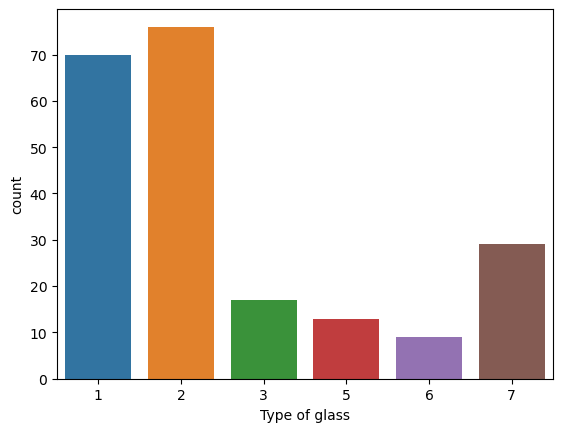

In [9]:
print(df['Type of glass'].value_counts())
sns.countplot(x = df['Type of glass'])
plt.show()

most of glass are from type 2 which is a good one

type 6 glass are the least

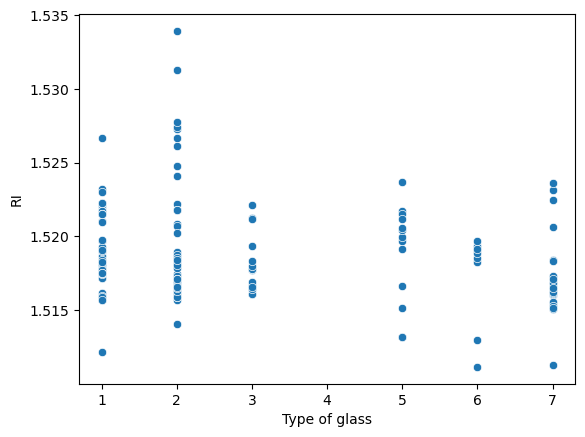

In [10]:
sns.scatterplot(x=df['Type of glass'] , y=df['RI'])
plt.show()

glass type 2 has more refractive index than any good glass type

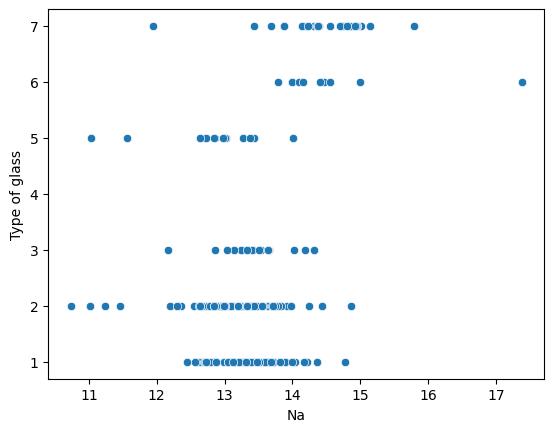

In [11]:
sns.scatterplot(y=df['Type of glass'] , x=df['Na'])
plt.show()

most of glass type 2 observation contain between 12 to 14 sodium weight percent in corresponding oxide

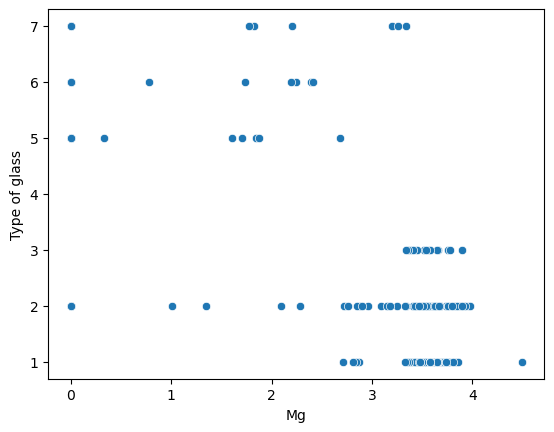

In [12]:
sns.scatterplot( x=df['Mg'] , y=df['Type of glass'] )
plt.show()

glass type 2 contains more Magnesium than any another type and type 6 and 7 contain the least

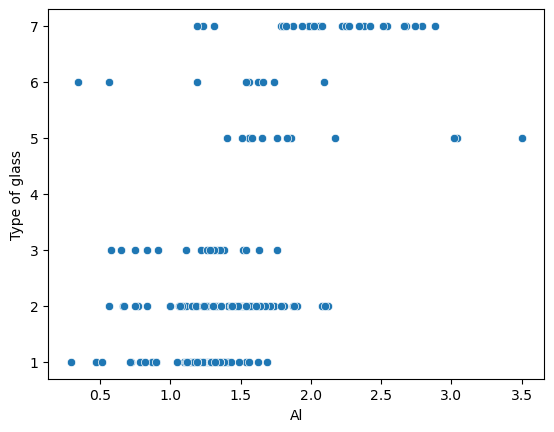

In [13]:
sns.scatterplot( x=df['Al'] , y=df['Type of glass'] )
plt.show()

glass type 7 has more weight percent of Aluminum than any type of glass which means low quality

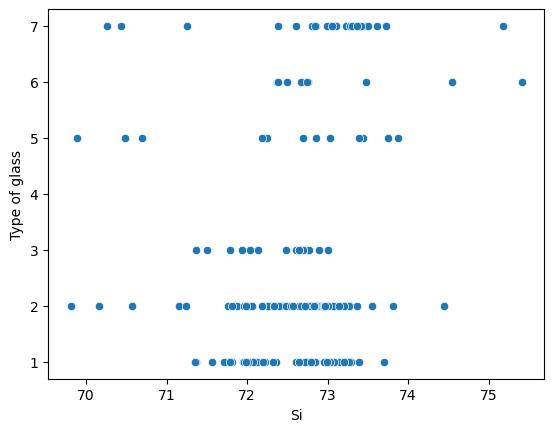

In [14]:
sns.scatterplot( x=df['Si'] , y=df['Type of glass'] )
plt.show()

good class types contains silicon more than low quality types

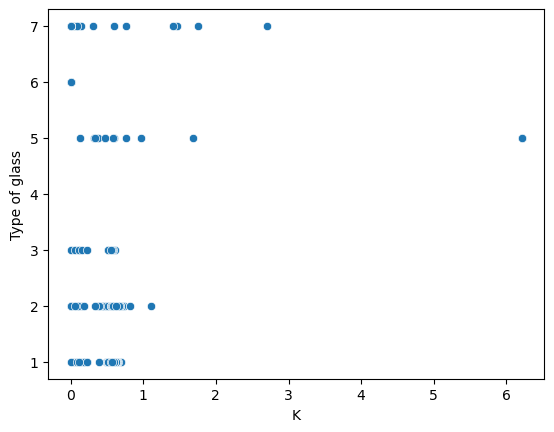

In [15]:
sns.scatterplot( x=df['K'] , y=df['Type of glass'] )
plt.show()

 glass type 2 observations contain Potassium mre than other types

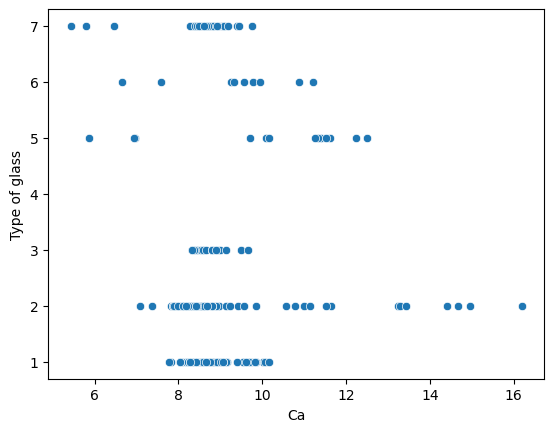

In [16]:
sns.scatterplot( x=df['Ca'] , y=df['Type of glass'] )
plt.show()

most of glass type 1 , 2 contains Calcium weight percent between 8 to 10 and higher ratios from 14 to 16 which reflects high quality

types 5 and 6 has ratios of Calcium between 10 and 14 while type 7 has the least weight as some obserrvations contain from 6 to 8 weight percent



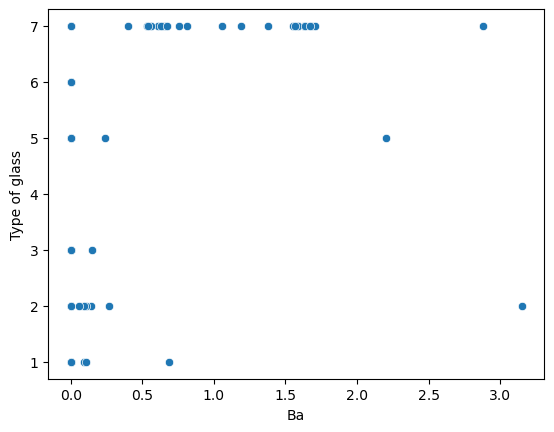

In [17]:
sns.scatterplot( x=df['Ba'] , y=df['Type of glass'] )
plt.show()

glass type 7 which is the worst classification of class has Barium weight percent more than any types which means low quality

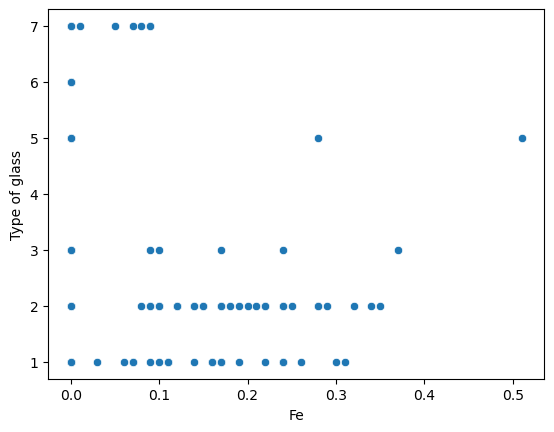

In [18]:
sns.scatterplot( x=df['Fe'] , y=df['Type of glass'] )
plt.show()

most of good glass types contain Iron more than other types

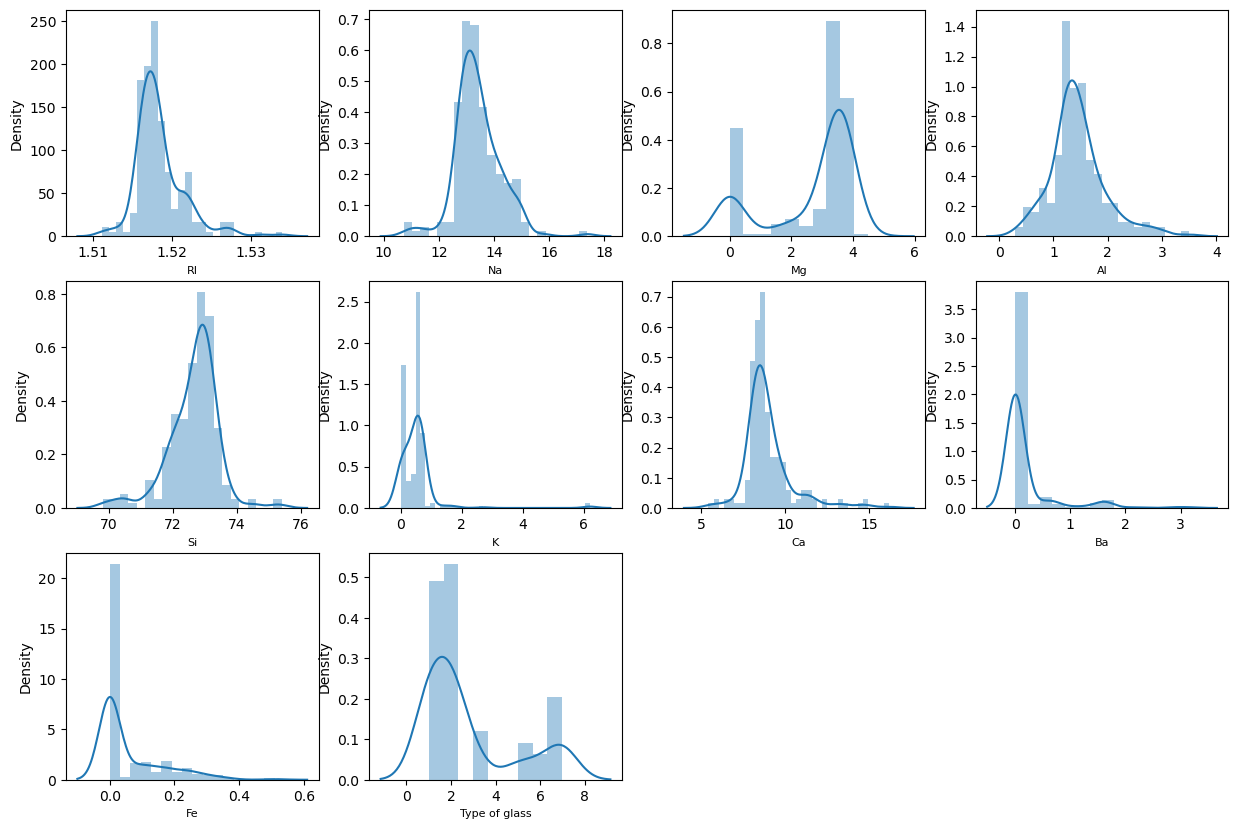

In [19]:
plt.figure(figsize=(15,10))
plotnumber = 1
for i in df.columns:
    if plotnumber <= 10 :
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize=8)
    plotnumber +=1
plt.show()    

Data looks normally distributed with some skewness which we will mdify

# Checking for outliers

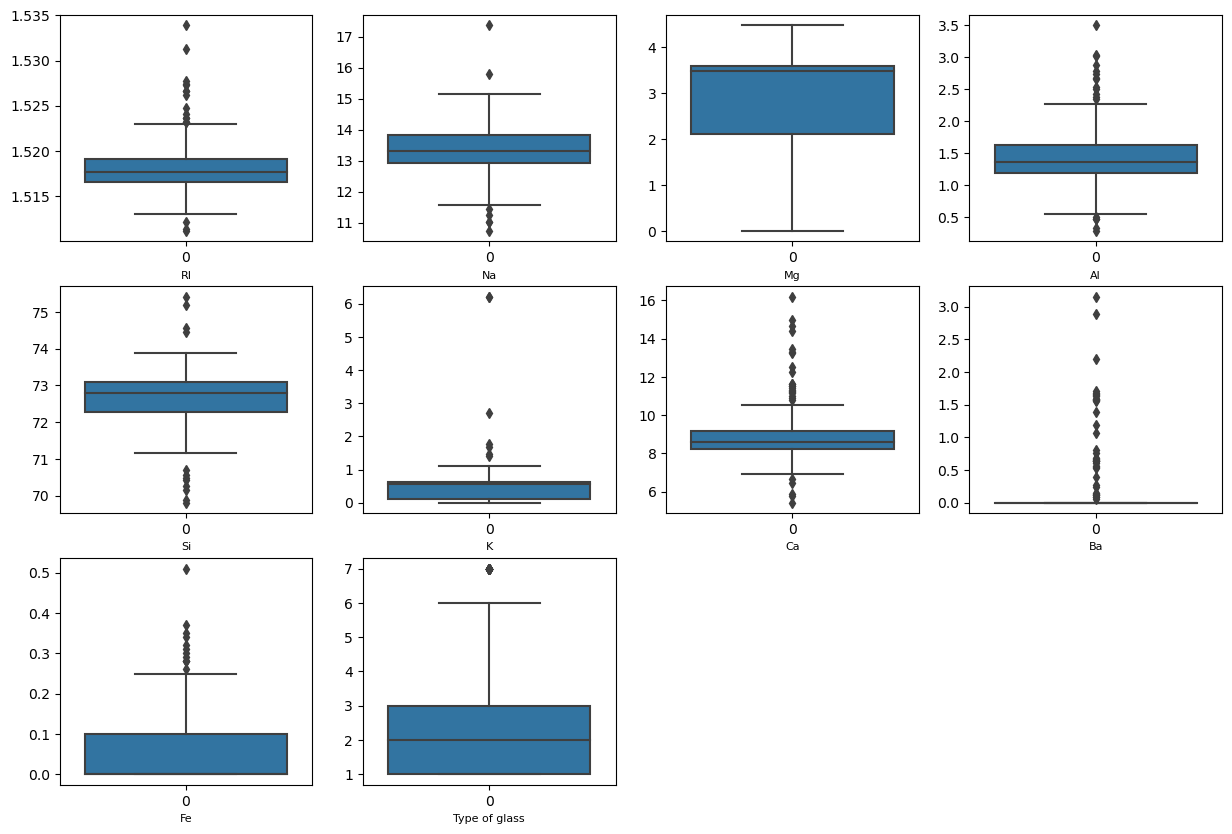

In [20]:
plt.figure(figsize=(15,10))
plotnumber = 1
for i in df.columns:
    if plotnumber <= 10 :
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i, fontsize=8)
    plotnumber +=1
plt.show()    

all of columns have data except the target label Type of glass and feature Mg

all data in Ba column are considered as outliers so no need to apply any method on it

In [21]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [22]:
#we will use z score methos to remove outliers
from scipy.stats import zscore

In [23]:
outliers=['RI', 'Na', 'Al', 'Si', 'K', 'Ca', 'Fe'] #columns we will remove outliers from
z = np.abs(zscore(df[outliers]))

In [24]:
z

,RI,Na,Al,Si,K,Ca,Fe
0,0.872868,0.284953,0.692442,1.127082,0.671705,0.145766,0.586451
1,0.249333,0.591817,0.170460,0.102319,0.026213,0.793734,0.586451
2,0.721318,0.149933,0.190912,0.438787,0.164533,0.828949,0.586451
3,0.232831,0.242853,0.310994,0.052974,0.112107,0.519052,0.586451
4,0.312045,0.169205,0.411375,0.555256,0.081369,0.624699,0.586451
...,...,...,...,...,...,...,...
209,0.704815,0.898681,2.881125,0.052974,0.640968,0.157088,0.586451
210,0.500178,1.856097,1.094342,0.529374,0.763919,0.392276,0.586451
211,0.754046,1.168721,1.154570,0.995252,0.763919,0.364103,0.586451
212,0.612399,1.193270,0.993960,1.241133,0.763919,0.335931,0.586451


In [25]:
filtering = (z<3).all(axis=1)
df1 = df[filtering]

In [26]:
print('old data shape is ',df.shape)
print('new data shape is ',df1.shape)
print('\npercentage of loss is ',((df.shape[0]-df1.shape[0])/(df.shape[0]))*100)

old data shape is  (214, 10)
new data shape is  (198, 10)

percentage of loss is  7.476635514018691


In [27]:
#use IQR method
q1 = df[outliers].quantile(0.25) # first percentile
q3 = df[outliers].quantile(0.75) #third percentile

IQR = q3 - q1

df2 = df[~((df <(q1 - 1.5*IQR)) | (df >(q3+ 1.5*IQR))).any(axis=1)]

In [28]:
print('old data shape is ',df.shape)
print('new data shape is ',df2.shape)
print('\npercentage of loss is ',((df.shape[0]-df2.shape[0])/(df.shape[0]))*100)

old data shape is  (214, 10)
new data shape is  (157, 10)

percentage of loss is  26.635514018691588


as we see above IQR method is the best method to remove outliers

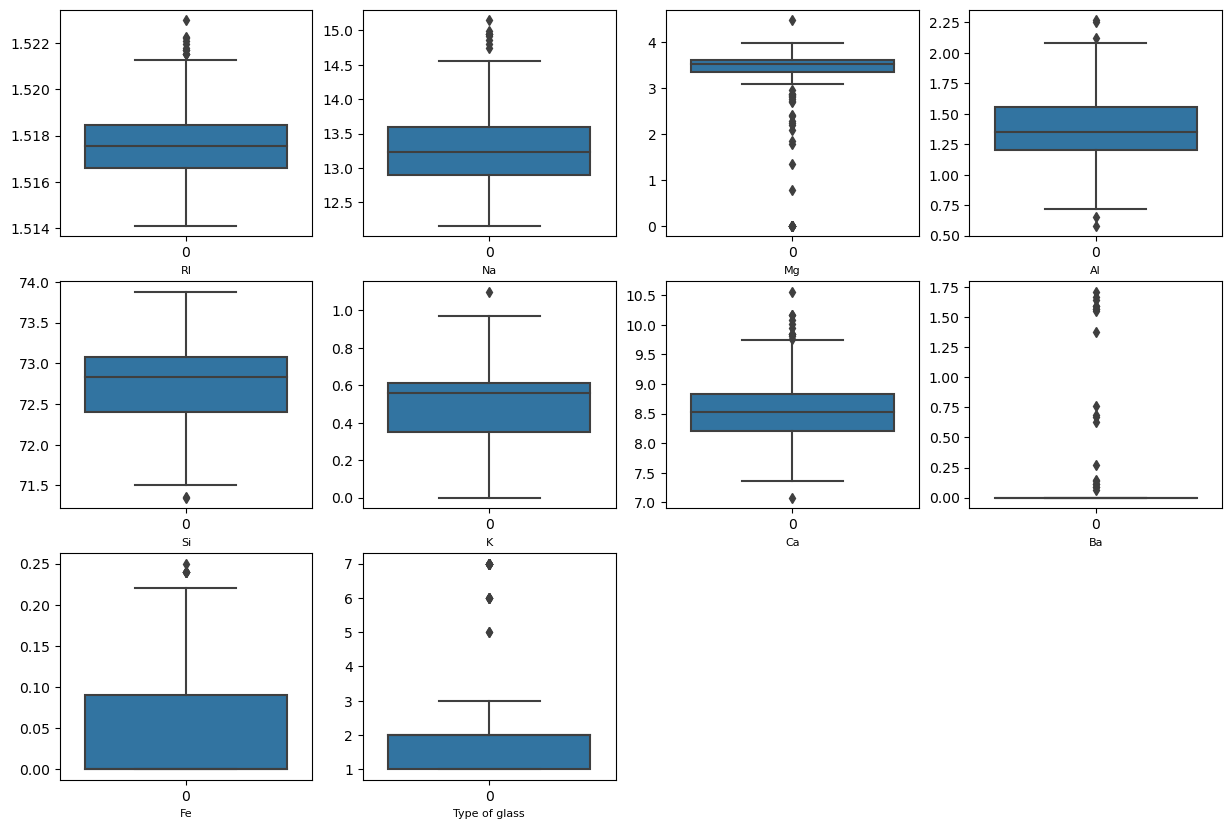

In [29]:
plt.figure(figsize=(15,10))
plotnumber = 1
for i in df2.columns:
    if plotnumber <= 10 :
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(df2[i])
        plt.xlabel(i, fontsize=8)
    plotnumber +=1
plt.show()  

we removed data as ossible as we afford

# removing skewness

In [30]:
df2.skew()

RI               1.029476
Na               1.003312
Mg              -2.355477
Al               0.212402
Si              -0.545523
K               -0.819958
Ca               0.853732
Ba               3.454060
Fe               1.341322
Type of glass    1.849056
dtype: float64

In [31]:
# we will modify skewness between 0.55 and -0.55  excepy type of glass because it is our target label
# and contains discrete data type
for i in ['RI', 'Na', 'Mg','K', 'Ca', 'Ba', 'Fe']:
    df2[i] = np.cbrt(df2[i])

In [32]:
df2.skew()

RI               1.027597
Na               0.923450
Mg              -3.012146
Al               0.212402
Si              -0.545523
K               -1.724025
Ca               0.715140
Ba               2.661657
Fe               0.904430
Type of glass    1.849056
dtype: float64

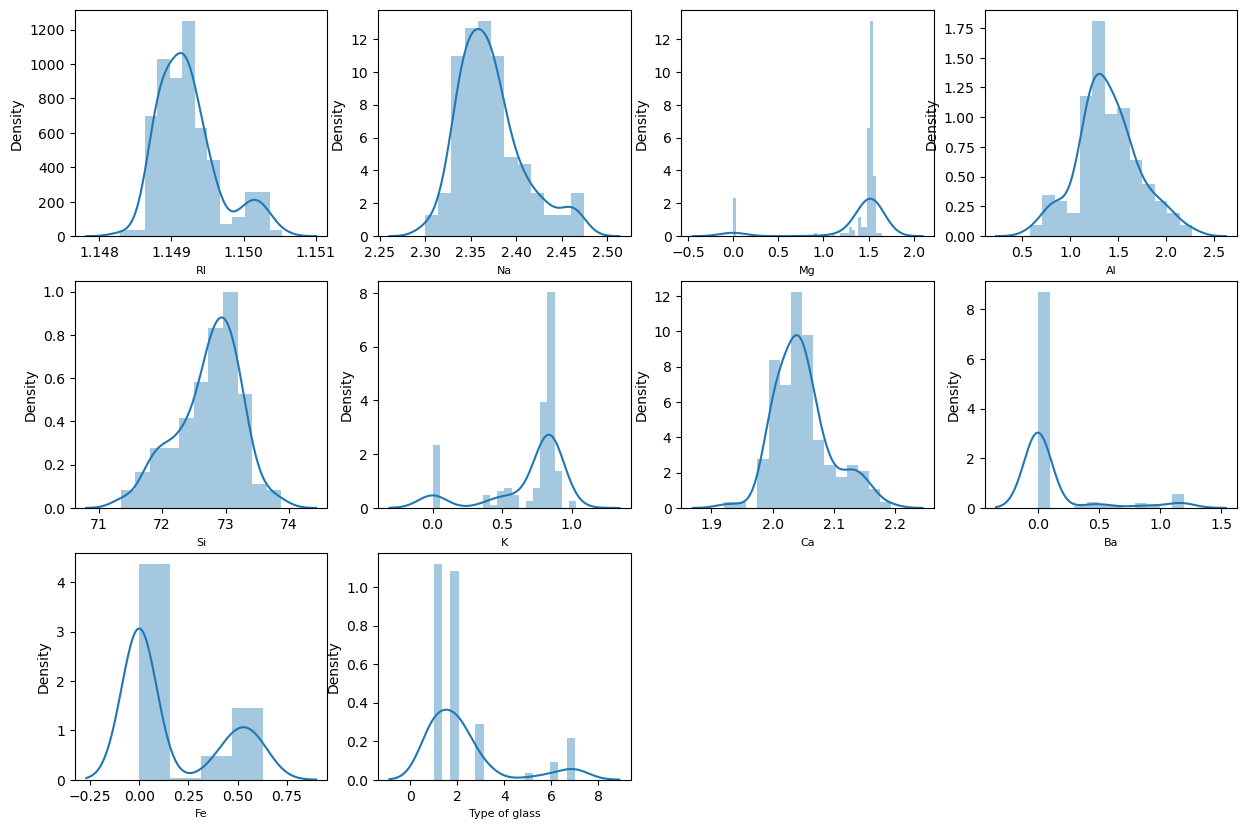

In [33]:
plt.figure(figsize=(15,10))
plotnumber = 1
for i in df2.columns:
    if plotnumber <= 10 :
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df2[i])
        plt.xlabel(i, fontsize=8)
    plotnumber +=1
plt.show()    

most of data look normally distributed with no much skewness except columns that have few unique continuous values like Mg and Ba so we will ignore them

# correlation

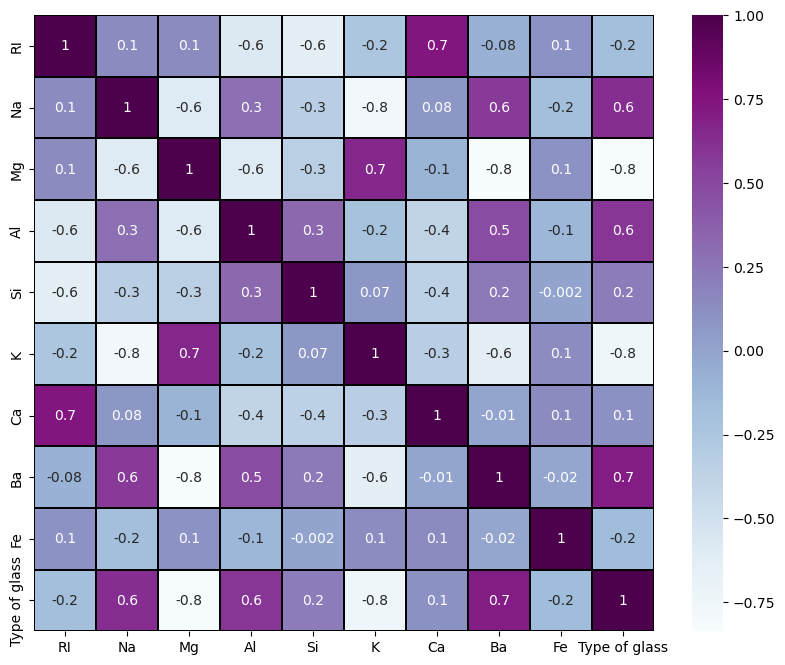

In [34]:
#visualize heatmap between variables
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr() , annot = True , linewidth=0.1 , cmap='BuPu' , linecolor='Black', fmt='0.1g')
plt.show()

from above we summerize that

target vaiable Type of glass has strong positive relation with Ba , Al and Na

features K ,Na have strong negative relation

target vaiable Type of glass has strong negative relation with K , Mg

most of data are correlated with each other which means our data is good

In [35]:
df2.corr()['Type of glass'].sort_values(ascending= False)

Type of glass    1.000000
Ba               0.709183
Na               0.630417
Al               0.587191
Si               0.220184
Ca               0.103509
Fe              -0.156948
RI              -0.179555
K               -0.752411
Mg              -0.825098
Name: Type of glass, dtype: float64

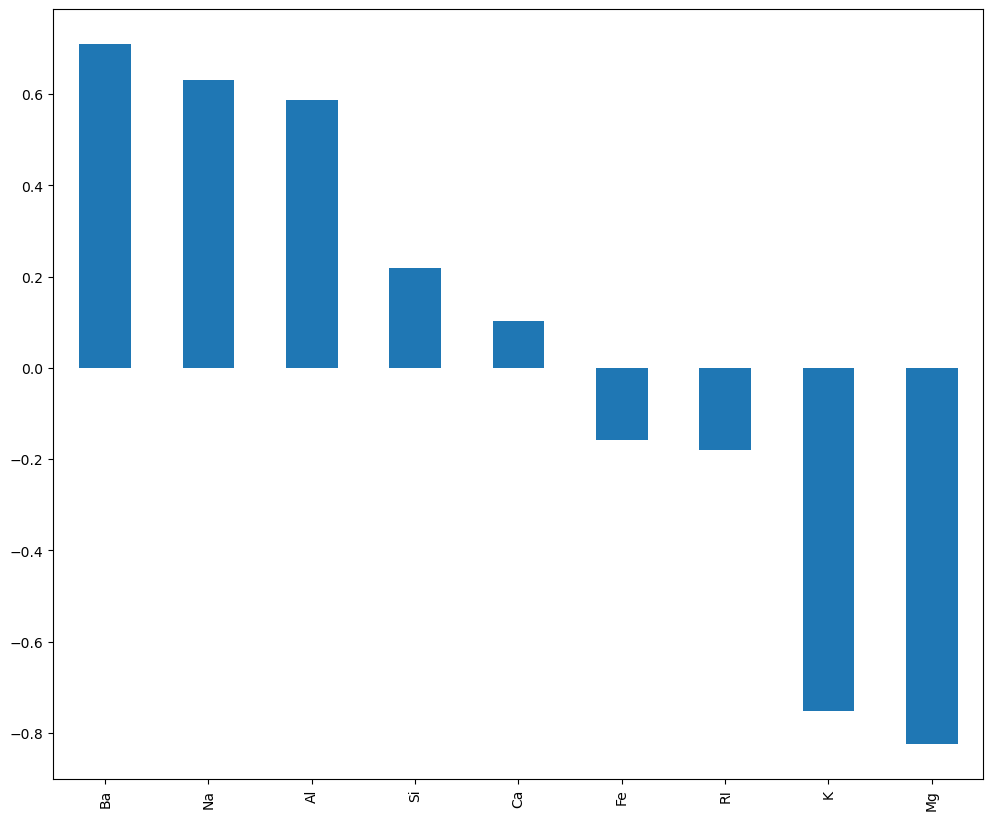

In [36]:
plt.figure(figsize=(12,10))
df2.corr()['Type of glass'].sort_values(ascending= False).drop('Type of glass').plot(kind='bar')
plt.show()

label target Type of glass has the strongest positive relation with Ba

label target Type of glass has the strongest negative relation with Mg


# Scaling features

In [37]:
x1 = df2.drop('Type of glass',axis=1)
y1 = df2['Type of glass']

In [40]:
y1

0      1
1      1
2      1
3      1
4      1
      ..
206    7
210    7
211    7
212    7
213    7
Name: Type of glass, Length: 157, dtype: int64

In [41]:
print('features label shape is ',x1.shape)
print('target label shape is ',y1.shape)

features label shape is  (157, 9)
target label shape is  (157,)


In [42]:
print(y1.unique())

[1 2 3 5 6 7]


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
x_scaled = pd.DataFrame( scaler.fit_transform(x1) , columns = x1.columns)
x_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.883222,0.502419,0.645187,-0.910384,-1.912288,-1.065527,0.247778,-0.366782,-0.664124
1,-0.127568,0.912942,0.357907,-0.097925,0.001155,0.319098,-1.370735,-0.366782,-0.664124
2,-0.974180,0.320199,0.340422,0.464547,0.524834,0.133912,-1.462253,-0.366782,-0.664124
3,-0.097976,-0.215576,0.388977,-0.316664,-0.240543,0.482361,-0.669927,-0.366782,-0.664124
4,-0.240024,-0.114465,0.364856,-0.472906,0.706107,0.447654,-0.936790,-0.366782,-0.664124
...,...,...,...,...,...,...,...,...,...
152,-0.814289,2.585295,-3.401378,1.495745,0.766532,-2.450152,0.111676,3.202398,-0.664124
153,-0.577449,2.554185,-3.401378,1.870726,0.665824,-2.450152,-0.353944,3.374965,-0.664124
154,1.670456,1.671583,-3.401378,1.964471,1.390918,-2.450152,-0.284339,3.413783,-0.664124
155,-0.778760,1.703496,-3.401378,1.714484,1.773607,-2.450152,-0.214955,3.359211,-0.664124


# Check Variance Inflation Factor

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values , i) for i in range(len(x_scaled.columns))]
vif['Columns']  = x_scaled.columns
vif

,VIF,Columns
0,4.793774,RI
1,7.685487,Na
2,11.162766,Mg
3,3.294751,Al
4,5.658529,Si
5,4.771381,K
6,4.104198,Ca
7,4.490847,Ba
8,1.123327,Fe


It seems that Mg has variance inflation factor more than 10 which mean a multicollineraity problem so we will remove it

In [52]:
x_scaled.drop('Mg',axis=1 , inplace=True)

In [54]:
x_scaled.shape

(157, 8)

In [55]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values , i) for i in range(len(x_scaled.columns))]
vif['Columns']  = x_scaled.columns
vif

,VIF,Columns
0,4.727391,RI
1,4.807885,Na
2,2.237753,Al
3,3.175992,Si
4,4.516448,K
5,2.738266,Ca
6,2.714635,Ba
7,1.105575,Fe


There is No multicollineraity problem

# Building Model

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.ensemble import AdaBoostRegressor , GradientBoostingClassifier , BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier , RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_curve

In [66]:
#chose the best random state number
lr = LogisticRegression()
accuracy = []
stats = []
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled , y1 , test_size=0.3 , random_state=i)
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    accu = accuracy_score(y_test,y_pred)
    accuracy.append(accu)
    stats.append(i)

In [69]:
randomstats = pd.DataFrame()
randomstats['accuracy'] = accuracy
randomstats['no.of stats'] = stats
randomstats

,accuracy,no.of stats
0,0.625000,0
1,0.666667,1
2,0.604167,2
3,0.687500,3
4,0.645833,4
...,...,...
195,0.541667,195
196,0.708333,196
197,0.583333,197
198,0.562500,198


In [70]:
randomstats[randomstats['accuracy'] == randomstats['accuracy'].max()]

,accuracy,no.of stats
139,0.875,139


the best accuracy is 87.5 when no.of stats is 139

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled , y1 , test_size=0.3 , random_state=139)

In [72]:
rfc = RandomForestClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()
bc = BaggingClassifier()
ac = AdaBoostClassifier()
etc = ExtraTreesClassifier()
dct = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [76]:
models = {'LogisticRegressin':lr ,'RandomForestClassifier':rfc , 'SVC':svc , 'GradientBoostingClassifier':gbc
          ,'BaggingClassifier': bc , 'AdaBoostClassifier':ac , 'ExtraTreesClassifier':etc ,
          'DecisionTreeClassifier':dct , 'KNeighborsClassifier':knn }
for name , m in models.items():
    m.fit(x_train , y_train)
    y_pred = m.predict(x_test)
    print('model is ',name)
    print('accuracy of test data is ','{:.2f}'.format(accuracy_score(y_test,y_pred)*100))
    print('accuracy of test data is ','{:.2f}'.format(accuracy_score(y_train , m.predict(x_train))*100))
    print('\n')
    print('confusion matrix is \n',confusion_matrix(y_test,y_pred))
    print('classification report is \n',classification_report(y_test,y_pred))
    print('\n')

model is  LogisticRegressin
accuracy of test data is  87.50
accuracy of test data is  71.56


confusion matrix is 
 [[18  0  1  0  0  0]
 [ 3 16  1  0  0  0]
 [ 0  1  1  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  4]]
classification report is 
               precision    recall  f1-score   support

           1       0.86      0.95      0.90        19
           2       0.94      0.80      0.86        20
           3       0.33      0.50      0.40         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         4

    accuracy                           0.88        48
   macro avg       0.86      0.87      0.86        48
weighted avg       0.89      0.88      0.88        48



model is  RandomForestClassifier
accuracy of test data is  87.50
accuracy of test data is  100.00


confusion matrix is 
 [[17  1  1  0  0  0]
 [ 1 18  1  0  0  0]
 [ 1  0  1  0  0  0]


RandomForestClassifier model gives the best accuracy on train and test data

# Cross Validation Score

In [77]:
models = {'LogisticRegressin':lr ,'RandomForestClassifier':rfc , 'SVC':svc , 'GradientBoostingClassifier':gbc
          ,'BaggingClassifier': bc , 'AdaBoostClassifier':ac , 'ExtraTreesClassifier':etc ,
          'DecisionTreeClassifier':dct , 'KNeighborsClassifier':knn }
for name , m in models.items():
    print('mdel name is ',name)
    score = cross_val_score(m , x_scaled , y1)
    print('score of ',name,' is ',score)
    print('mean is ',score.mean())
    print('\ndifference between accuracy score and score mean is ',accuracy_score(y_test,m.predict(x_test))-(score.mean()))
    print('\n')

mdel name is  LogisticRegressin
score of  LogisticRegressin  is  [0.65625    0.8125     0.58064516 0.77419355 0.70967742]
mean is  0.7066532258064516

difference between accuracy score and score mean is  0.16834677419354838


mdel name is  RandomForestClassifier
score of  RandomForestClassifier  is  [0.8125     0.75       0.64516129 0.70967742 0.67741935]
mean is  0.7189516129032257

difference between accuracy score and score mean is  0.15604838709677427


mdel name is  SVC
score of  SVC  is  [0.625      0.84375    0.51612903 0.61290323 0.58064516]
mean is  0.6356854838709677

difference between accuracy score and score mean is  0.21848118279569895


mdel name is  GradientBoostingClassifier
score of  GradientBoostingClassifier  is  [0.84375    0.65625    0.70967742 0.61290323 0.64516129]
mean is  0.6935483870967742

difference between accuracy score and score mean is  0.014784946236559127


mdel name is  BaggingClassifier
score of  BaggingClassifier  is  [0.8125     0.6875     0.64516

GradientBoostingClassifier has the least variance inflation factor but it is overfitted and so DecisionTreeClassifier so we wil use logistic regression as the best model to train 

# Hyperparameters

In [104]:
lr = LogisticRegression(solver='lbfgs', max_iter = 3000)
lr.fit(x_train , y_train)

LogisticRegression(max_iter=3000)

In [105]:
print(accuracy_score(y_test,lr.predict(x_test))*100)

87.5


That is the best accuracy we can get using logistic regression model

In [108]:
y_pred = lr.predict(x_test)
print('confusion matrix is\n',confusion_matrix(y_test,y_pred))
print('\nclassification report is\n',classification_report(y_test,y_pred))

confusion matrix is
 [[18  0  1  0  0  0]
 [ 3 16  1  0  0  0]
 [ 0  1  1  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  4]]

classification report is
               precision    recall  f1-score   support

           1       0.86      0.95      0.90        19
           2       0.94      0.80      0.86        20
           3       0.33      0.50      0.40         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         4

    accuracy                           0.88        48
   macro avg       0.86      0.87      0.86        48
weighted avg       0.89      0.88      0.88        48



In [109]:
#the accuracy of training model
print(accuracy_score(y_train , lr.predict(x_train)))

0.7155963302752294


# predict the type of glass

In [142]:
prediction = pd.DataFrame()
prediction['actual'] = y_test
prediction['predicted'] = y_pred

type_of_glass = []
for i in prediction['predicted']:
    if i in np.arange(1,5):
        type_of_glass.append('Window Glass')
    else:
        type_of_glass.append('NoN Window Glass')
prediction['Type of Glass'] = type_of_glass
prediction

,actual,predicted,Type of Glass
126,2,3,Window Glass
84,2,2,Window Glass
34,1,1,Window Glass
88,2,2,Window Glass
168,5,5,NoN Window Glass
80,2,2,Window Glass
62,1,1,Window Glass
15,1,1,Window Glass
181,6,6,NoN Window Glass
79,2,2,Window Glass
